In [26]:
#@title
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

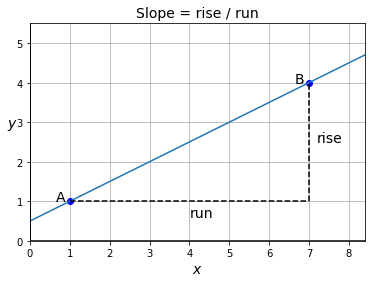

In [28]:
#@title
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

def plot_rise_over_run(A_pos, B_pos):
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

A_pos = np.array([1, 1])
B_pos = np.array([7, 4])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

In [8]:
# cari turunan fungsi y = x^2+2x+1 dan y = 4x^3-3x^2+2x-1
# definisikan x = symbol
x = sy.Symbol("x", real=True)
f = x**2+2*x+1
f.diff(x)

2*x + 2

In [5]:
f = 4*x**3-3*x**2+2*x-1
f.diff(x)

12*x**2 - 6*x + 2

In [46]:
# turunan numerical
import numpy as np
np.linspace(0,20)

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [47]:
x = np.linspace(0,20)
y = x**2+2*x+1
np.diff(y)/np.diff(x)

array([ 2.40816327,  3.2244898 ,  4.04081633,  4.85714286,  5.67346939,
        6.48979592,  7.30612245,  8.12244898,  8.93877551,  9.75510204,
       10.57142857, 11.3877551 , 12.20408163, 13.02040816, 13.83673469,
       14.65306122, 15.46938776, 16.28571429, 17.10204082, 17.91836735,
       18.73469388, 19.55102041, 20.36734694, 21.18367347, 22.        ,
       22.81632653, 23.63265306, 24.44897959, 25.26530612, 26.08163265,
       26.89795918, 27.71428571, 28.53061224, 29.34693878, 30.16326531,
       30.97959184, 31.79591837, 32.6122449 , 33.42857143, 34.24489796,
       35.06122449, 35.87755102, 36.69387755, 37.51020408, 38.32653061,
       39.14285714, 39.95918367, 40.7755102 , 41.59183673])

In [48]:
np.gradient(y,x)

array([ 2.40816327,  2.81632653,  3.63265306,  4.44897959,  5.26530612,
        6.08163265,  6.89795918,  7.71428571,  8.53061224,  9.34693878,
       10.16326531, 10.97959184, 11.79591837, 12.6122449 , 13.42857143,
       14.24489796, 15.06122449, 15.87755102, 16.69387755, 17.51020408,
       18.32653061, 19.14285714, 19.95918367, 20.7755102 , 21.59183673,
       22.40816327, 23.2244898 , 24.04081633, 24.85714286, 25.67346939,
       26.48979592, 27.30612245, 28.12244898, 28.93877551, 29.75510204,
       30.57142857, 31.3877551 , 32.20408163, 33.02040816, 33.83673469,
       34.65306122, 35.46938776, 36.28571429, 37.10204082, 37.91836735,
       38.73469388, 39.55102041, 40.36734694, 41.18367347, 41.59183673])

In [49]:
from scipy.optimize import minimize_scalar

def f(x):
  return x**2+2*x+1 #x^2+2x+1

opt = minimize_scalar(f)
opt.x

-1.0000000000000002

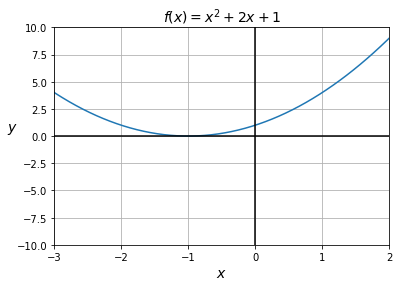

In [50]:
xs = np.linspace(-5, 5, 100)
ys = f(xs)
plt.plot(xs, ys)
show(axis=[-3, 2, -10, 10], title=r"$f(x)=x^2+2x+1$")